    This script is similar like ANN_example3.ipynb. It includes the weather condition ("Rain" and "Sun") as the input fetures. The accuracy is not good than ANN_example3.ipynb.
    Development Date: 2018.07.01

In [123]:
import csv
import pandas as pd
sample_df = pd.read_csv("LeaveTimesTrips_JUN.csv")
sample_df.count()
#sample_df.head()

TripId             4208619
DataSource         4208619
DayOfService       4208619
ProgrNumber        4208619
StopPointId        4208619
PlannedTime_Arr    4208619
PlannedTime_Dep    4208619
ActualTime_Arr     4208619
ActualTime_Dep     4208619
VehicleId          4208619
Passengers               0
Passengersin             0
Distance                 0
Suppressed               0
JustificationId          0
LastUpdate               0
Note                     0
LineId             4208619
RouteId            4208619
Direction          4208619
dtype: int64

In [124]:
# How many lines
lines = sample_df['LineId'].unique()
print(len(lines))

123


In [125]:
sample_df = sample_df[(sample_df['LineId']=='39A')]
sample_df.head()

,TripId,DataSource,DayOfService,ProgrNumber,StopPointId,PlannedTime_Arr,PlannedTime_Dep,ActualTime_Arr,ActualTime_Dep,VehicleId,Passengers,Passengersin,Distance,Suppressed,JustificationId,LastUpdate,Note,LineId,RouteId,Direction
260,5108092,DB,2017-06-28,58,751,42071,42071,44775,44782,1000922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2
261,5108092,DB,2017-06-28,26,4747,39484,39484,39865,39957,1000922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2
262,5108092,DB,2017-06-28,43,1713,40674,40674,41219,41219,1000922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2
263,5108092,DB,2017-06-28,59,752,42137,42137,44875,44886,1000922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2
264,5108092,DB,2017-06-28,27,1845,39882,39882,40305,40314,1000922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2


In [126]:
sample_df.ProgrNumber.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73])

In [127]:
sample_df.StopPointId.sort_values().unique()

array([ 313,  315,  328,  335,  349,  404,  747,  748,  749,  750,  751,
        752,  753,  754,  755,  756,  757,  758,  759,  760,  761,  762,
        763,  767,  768,  769,  770,  771,  772,  773,  774,  775,  776,
        777,  779,  780,  781,  782,  783,  784,  785,  786,  793, 1443,
       1444, 1445, 1478, 1479, 1647, 1648, 1649, 1660, 1661, 1662, 1664,
       1665, 1666, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1713,
       1714, 1715, 1805, 1806, 1807, 1808, 1845, 1847, 1850, 1858, 1859,
       1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1869, 1870, 1871,
       1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1898, 1899, 1905,
       1906, 1907, 1908, 1909, 1911, 1913, 1914, 2171, 4464, 4489, 4492,
       4747, 6107, 6108, 6109, 6110, 6111, 6112, 6113, 7011, 7017, 7018,
       7020, 7021, 7025, 7029, 7030, 7038, 7047, 7048, 7158, 7159, 7160,
       7161, 7162, 7166, 7167, 7388, 7389, 7453, 7576, 7586, 7587, 7588])

In [128]:
import datetime
# Filter Monday days from other days
def my_test(d):
    a,b,c = d.split('-')
    return datetime.datetime(int(a),int(b),int(c)).weekday() == 1
sample_df['isMondayDay'] = sample_df.apply(lambda row: my_test(row['DayOfService']), axis=1)

In [129]:
def my_test3(d, a):
    #return str(a//3600).zfill(2) + ":" + str(a%3600//60).zfill(2)+ ":" + str(a%3600%60).zfill(2)
    return  d + " " + str(a//3600).zfill(2) + ":" + str(0).zfill(2) + ":" + str(0).zfill(2)
    #return a/3600
sample_df['dayInterval'] = sample_df.apply(lambda row: my_test3(row['DayOfService'],row['PlannedTime_Arr']), axis=1)

In [130]:
sample_df[(sample_df['StopPointId']==313)].head()

,TripId,DataSource,DayOfService,ProgrNumber,StopPointId,PlannedTime_Arr,PlannedTime_Dep,ActualTime_Arr,ActualTime_Dep,VehicleId,...,Distance,Suppressed,JustificationId,LastUpdate,Note,LineId,RouteId,Direction,isMondayDay,dayInterval
324,5108092,DB,2017-06-29,50,313,41382,41382,42177,42177,1000603,...,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2,False,2017-06-29 11:00:00
390,5108094,DB,2017-06-29,50,313,53982,53982,54705,54705,1000603,...,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2,False,2017-06-29 14:00:00
10452,5109230,DB,2017-06-29,50,313,69967,69967,71292,71292,1000944,...,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2,False,2017-06-29 19:00:00
33039,5101715,DB,2017-06-29,50,313,38982,38982,39408,39408,1000950,...,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2,False,2017-06-29 10:00:00
33120,5101719,DB,2017-06-29,50,313,64224,64224,64798,64798,1000950,...,NaN,NaN,NaN,NaN,NaN,39A,39A_43,2,False,2017-06-29 17:00:00


In [131]:
sample_df['LineId'].unique()

array(['39A'], dtype=object)

In [132]:
w_df = pd.read_csv("Weather.csv")

In [133]:
# Only select weather information from 'Casement'
w_df = w_df[(w_df['StationName'] == 'Casement')]

In [134]:
#new_res = pd.merge(res, weather_df, on = ['TripId', 'DayOfService'])
new_sample_df = sample_df.merge(w_df, left_on='dayInterval', right_on='Date')

In [135]:
stations = new_sample_df['ProgrNumber'].sort_values().unique()

In [136]:
# Drop several columns
sample_df = new_sample_df.drop(['DataSource','Passengers', 'Passengersin','Distance', 'Suppressed','JustificationId','LastUpdate','Note','VehicleId', 'LineId', 'RouteId'], axis=1)
sample_df.head()

,TripId,DayOfService,ProgrNumber,StopPointId,PlannedTime_Arr,PlannedTime_Dep,ActualTime_Arr,ActualTime_Dep,Direction,isMondayDay,dayInterval,Date,Rain,Sun,Temp,Wdsp,StationName
0,5108092,2017-06-28,58,751,42071,42071,44775,44782,2,False,2017-06-28 11:00:00,2017-06-28 11:00:00,1.4,0.0,13.1,7,Casement
1,5108092,2017-06-28,43,1713,40674,40674,41219,41219,2,False,2017-06-28 11:00:00,2017-06-28 11:00:00,1.4,0.0,13.1,7,Casement
2,5108092,2017-06-28,59,752,42137,42137,44875,44886,2,False,2017-06-28 11:00:00,2017-06-28 11:00:00,1.4,0.0,13.1,7,Casement
3,5108092,2017-06-28,27,1845,39882,39882,40305,40314,2,False,2017-06-28 11:00:00,2017-06-28 11:00:00,1.4,0.0,13.1,7,Casement
4,5108092,2017-06-28,44,1714,40716,40716,41243,41258,2,False,2017-06-28 11:00:00,2017-06-28 11:00:00,1.4,0.0,13.1,7,Casement


In [137]:
sample_df = sample_df.drop(['dayInterval','Date', 'StationName', 'Temp', 'Wdsp'], axis=1)

In [138]:
sample_df.loc[sample_df.Rain > 0.0, 'Rain'] = 1
sample_df.loc[sample_df.Sun > 0, 'Sun'] = 1

In [139]:
sample_df.to_csv("39A_LeaveTimesTripsWeather_JUN.csv")

In [140]:
sample_df = pd.read_csv("39A_LeaveTimesTripsWeather_JUN.csv")

In [141]:
sample_df['isMondayDay'] = sample_df['isMondayDay'].astype('int')
sample_df.dtypes

Unnamed: 0           int64
TripId               int64
DayOfService        object
ProgrNumber          int64
StopPointId          int64
PlannedTime_Arr      int64
PlannedTime_Dep      int64
ActualTime_Arr       int64
ActualTime_Dep       int64
Direction            int64
isMondayDay          int64
Rain               float64
Sun                float64
dtype: object

In [142]:
sample_a_df = sample_df[(sample_df['Direction']) == 1]
sample_b_df = sample_df[(sample_df['Direction']) == 2]

In [143]:
sample_x_df = sample_b_df
#sample_x_df = sample_b_df

In [149]:
tripids = sample_x_df['TripId'].sort_values().unique()
print(tripids[:100])

[5002342 5002344 5002346 5002348 5002350 5002352 5002461 5002463 5002465
 5002467 5003101 5003103 5003105 5003482 5003484 5003486 5003488 5003490
 5003492 5003604 5003606 5003608 5003708 5003710 5003712 5003714 5003993
 5004028 5004030 5004032 5004034 5004036 5004038 5004552 5004554 5004628
 5004630 5004632 5004634 5004636 5005105 5005107 5005109 5005111 5005113
 5005628 5005630 5005632 5005983 5005985 5005987 5005989 5006274 5006276
 5006278 5006280 5006288 5006290 5006292 5006294 5006462 5006579 5006581
 5006583 5006585 5006989 5006991 5006993 5006996 5006998 5007134 5007153
 5007155 5007157 5007159 5007161 5007872 5007874 5007876 5007878 5007880
 5007943 5007945 5007947 5007949 5007951 5007979 5007981 5007982 5007984
 5007986 5008290 5008292 5008294 5008296 5008298 5008300 5008527 5008529
 5008531]


In [153]:
sample_x_df.TripId.sort_values().unique()

In [154]:
dayOfService = sample_x_df[(sample_x_df['TripId'] == 5002342)].DayOfService.sort_values().unique()
for day in dayOfService:
    print(day)

2017-06-01
2017-06-07
2017-06-08
2017-06-09


In [155]:
#temp = sample_a_df[(sample_a_df['TripId'] == 5002790) & (sample_a_df['ProgrNumber'] == 1)]
temp = sample_x_df[(sample_x_df['TripId'] == 5002790) & (sample_x_df['DayOfService'] == '2017-06-02')].sort_values(by='ProgrNumber')
#temp

In [156]:
print(stations)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73]


In [158]:
oneStationRow = sample_x_df[(sample_x_df['TripId'] == 5002342) \
                            & (sample_x_df['DayOfService'] == '2017-06-01') \
                            & (sample_x_df['ProgrNumber'] == 2 )]
oneStationRow

,Unnamed: 0,TripId,DayOfService,ProgrNumber,StopPointId,PlannedTime_Arr,PlannedTime_Dep,ActualTime_Arr,ActualTime_Dep,Direction,isMondayDay,Rain,Sun
113404,113404,5002342,2017-06-01,2,7048,22240,22240,22258,22258,2,0,0.0,1.0


In [159]:
# 46A only has 66 stations
count = 1
tag = 0

for tripid in tripids:
    # Pick the first 100 trips
    #if tag >= 100:
    #    break
    #else:
    #    tag += 1
    dayOfService = sample_x_df[(sample_x_df['TripId'] == tripid)].DayOfService.sort_values().unique()
    for day in dayOfService:
        
        timepool = {}
        pool = []
        isUseful = True
        miss_count = 0
        for i in stations:
            oneStationRow = sample_x_df[(sample_x_df['TripId'] == tripid) & (sample_x_df['DayOfService'] == day) & (sample_x_df['ProgrNumber'] == i )]
            #print(oneStationRow)
            try:
                if i < 10:
                    timepool['Rain'] = oneStationRow['Rain'].iloc[0]
                    timepool['Sun'] = oneStationRow['Sun'].iloc[0]
                    #timepool['isMondayDay'] = oneStationRow['isMondayDay'].iloc[0]
                #timepool.append([oneStationRow['PlannedTime_Arr'].iloc[0], oneStationRow['ActualTime_Arr'].iloc[0]])
                timepool['{}_P'.format(str(i).zfill(3))] = oneStationRow['PlannedTime_Arr'].iloc[0]
                timepool['{}_A'.format(str(i).zfill(3))] = oneStationRow['ActualTime_Arr'].iloc[0]
                last_plannedtime_arr = oneStationRow['PlannedTime_Arr'].iloc[0]
                last_actualtime_arr = oneStationRow['ActualTime_Arr'].iloc[0]
            except:
                timepool['{}_P'.format(str(i).zfill(3))] = last_plannedtime_arr + 15
                timepool['{}_A'.format(str(i).zfill(3))] = last_actualtime_arr + 15
                miss_count += 1
                if miss_count >= 7:
                    isUseful = False
                    break
                continue
        #print('----'*20)
        #print(timepool)
        if isUseful == True:
            print(tripid, day, "===" * 20)
            #print(timepool)
             
            if count == 1:
                df = pd.DataFrame(data=timepool,index=[0])
            else:
                df.loc[count] = timepool
            count += 1
        if count % 10 == 0:
            print(count)

5002342 2017-06-07 ============================================================
5002342 2017-06-08 ============================================================
5002342 2017-06-09 ============================================================
5002344 2017-06-07 ============================================================
5002344 2017-06-08 ============================================================
5002344 2017-06-09 ============================================================
5002346 2017-06-01 ============================================================
5002346 2017-06-07 ============================================================
5002346 2017-06-08 ============================================================
10
5002346 2017-06-09 ============================================================
5002348 2017-06-07 ============================================================
5002348 2017-06-08 ============================================================
5002348 2017-06-09 ==================

5006274 2017-06-17 ============================================================
5006276 2017-06-10 ============================================================
5006276 2017-06-17 ============================================================
5006278 2017-06-10 ============================================================
5006280 2017-06-10 ============================================================
5006288 2017-06-10 ============================================================
5006288 2017-06-17 ============================================================
110
5006290 2017-06-10 ============================================================
5006290 2017-06-17 ============================================================
5006292 2017-06-10 ============================================================
5006294 2017-06-10 ============================================================
5006294 2017-06-17 ============================================================
5006462 2017-06-10 =================

5012693 2017-06-07 ============================================================
5012693 2017-06-08 ============================================================
5012693 2017-06-09 ============================================================
5012695 2017-06-01 ============================================================
5012695 2017-06-07 ============================================================
210
5012695 2017-06-08 ============================================================
5012695 2017-06-09 ============================================================
5012697 2017-06-01 ============================================================
5012697 2017-06-07 ============================================================
5012697 2017-06-08 ============================================================
5012697 2017-06-09 ============================================================
5012699 2017-06-01 ============================================================
5012699 2017-06-02 =================

5016139 2017-06-17 ============================================================
5017395 2017-06-17 ============================================================
5017397 2017-06-17 ============================================================
310
310
5017399 2017-06-17 ============================================================
5017757 2017-06-17 ============================================================
5017759 2017-06-17 ============================================================
5018052 2017-06-17 ============================================================
5018054 2017-06-17 ============================================================
5018056 2017-06-17 ============================================================
5018058 2017-06-10 ============================================================
5018058 2017-06-17 ============================================================
5018060 2017-06-17 ============================================================
5018062 2017-06-17 =============

5087376 2017-06-19 ============================================================
410
5087376 2017-06-20 ============================================================
5087376 2017-06-21 ============================================================
5087750 2017-06-21 ============================================================
5087766 2017-06-19 ============================================================
5087766 2017-06-20 ============================================================
5087766 2017-06-21 ============================================================
5087768 2017-06-19 ============================================================
5087768 2017-06-20 ============================================================
5087768 2017-06-21 ============================================================
5087770 2017-06-19 ============================================================
420
5087770 2017-06-20 ============================================================
5087770 2017-06-21 =============

5090903 2017-06-19 ============================================================
5090903 2017-06-20 ============================================================
5090903 2017-06-21 ============================================================
5090905 2017-06-19 ============================================================
5090905 2017-06-20 ============================================================
5090905 2017-06-21 ============================================================
5091733 2017-06-19 ============================================================
5091733 2017-06-20 ============================================================
5091733 2017-06-21 ============================================================
520
5091735 2017-06-19 ============================================================
5091735 2017-06-20 ============================================================
5091735 2017-06-21 ============================================================
5091737 2017-06-19 =================

5096384 2017-06-21 ============================================================
5097157 2017-06-18 ============================================================
5097159 2017-06-18 ============================================================
5097161 2017-06-18 ============================================================
5097163 2017-06-18 ============================================================
5097569 2017-06-19 ============================================================
5097569 2017-06-20 ============================================================
620
5097569 2017-06-21 ============================================================
5097571 2017-06-20 ============================================================
5097571 2017-06-21 ============================================================
5097573 2017-06-20 ============================================================
5097575 2017-06-19 ============================================================
5097575 2017-06-20 =================

5116300 2017-06-30 ============================================================
5116302 2017-06-30 ============================================================
5116304 2017-06-30 ============================================================
5116473 2017-06-30 ============================================================
5116486 2017-06-30 ============================================================
720
720
5116784 2017-06-30 ============================================================
5116790 2017-06-30 ============================================================
5116990 2017-06-30 ============================================================
5116992 2017-06-30 ============================================================
5116994 2017-06-30 ============================================================
5117243 2017-06-30 ============================================================
5117245 2017-06-30 ============================================================
5117247 2017-06-30 =============

In [160]:
df.to_csv("39A_b_73stations_WEATHER_JUN.csv")

In [161]:
ErrorArray = []
len(df)

730

In [206]:
import csv
import pandas as pd
new_df = pd.read_csv("39A_b_73stations_WEATHER_JUN.csv")
#new_df = pd.read_csv("FINAL_39A_73stations_JUN.csv")

In [207]:
new_df.Rain.count()

730

In [208]:
# BP neural networking training
import numpy as np
#from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
# X Descriptive features (6 continous features)
# y Target feature (happiness_class)
a_columns = []
b_columns = []
#columns = []
for i in stations:
    #columns.append('a_{}'.format(i))
    #columns.append('b_{}'.format(i))
    a_columns.append('{}_P'.format(str(i).zfill(3)))
    b_columns.append('{}_A'.format(str(i).zfill(3)))
a_columns.append('Sun')
a_columns.append('Rain')
#a_columns.append("isMondayDay")
X = pd.concat([new_df[a_columns]], axis=1)

y = new_df[b_columns]
X = X.fillna(X.mean())
y = y.fillna(y.mean())


In [209]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [210]:
# 99% score
clf = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(100, 100, 100), random_state=1)
#
#clf = MLPRegressor(hidden_layer_sizes=(6, 6, 6), max_iter=600)
#clf = MLPRegressor(hidden_layer_sizes=(5,5,5))
clf.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [211]:
print("Training set score: %f" % clf.score(X_test, y_test))
print("Training set loss: %f" % clf.loss_)

Training set score: 0.999350
Training set loss: 135332.537431


In [212]:
predictions = clf.predict(X_test)

In [213]:
# Plot outputs
#from matplotlib import pyplot as plt
#plt.scatter(X_test, y_test,  color='black')
#plt.plot(X_test, predictions, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

#plt.show()

In [214]:
print("Index| prediction |Actual result| error")

#for prediction in predictions:
 #   print(prediction)
station = 10
count = 0
errors = []
for i in y_test.index:
    error = predictions[count][station] - y_test.loc[i][station]
    #print(i, "\t", predictions[count][station],"\t", y_test.loc[i][station], "\t", error) 
    errors.append(error)
    count += 1
ErrorArray.append(errors)

Index| prediction |Actual result| error


In [215]:
print(len(ErrorArray[0]))

183


In [216]:
print(len(ErrorArray))

5


In [217]:
import numpy as np
newErrorArray = np.transpose(ErrorArray)

In [218]:
df = pd.DataFrame(data=newErrorArray,columns=['Group1','Group2','Group3', 'Group4','Group5'])
df['BASELINE'] = 0

In [219]:
df.head()

,Group1,Group2,Group3,Group4,Group5,BASELINE
0,37.295779,28.905838,21.520370,141.625567,-241.143076,0
1,-364.919746,-70.809084,367.176939,-2.556503,-255.690477,0
2,-55.785735,11.071126,-372.804806,82.984148,-83.769024,0
3,-88.492662,2.279154,-44.580459,-65.370318,27.886308,0
4,16.913324,9.877435,60.717460,151.644832,-317.629418,0


<Figure size 432x288 with 0 Axes>

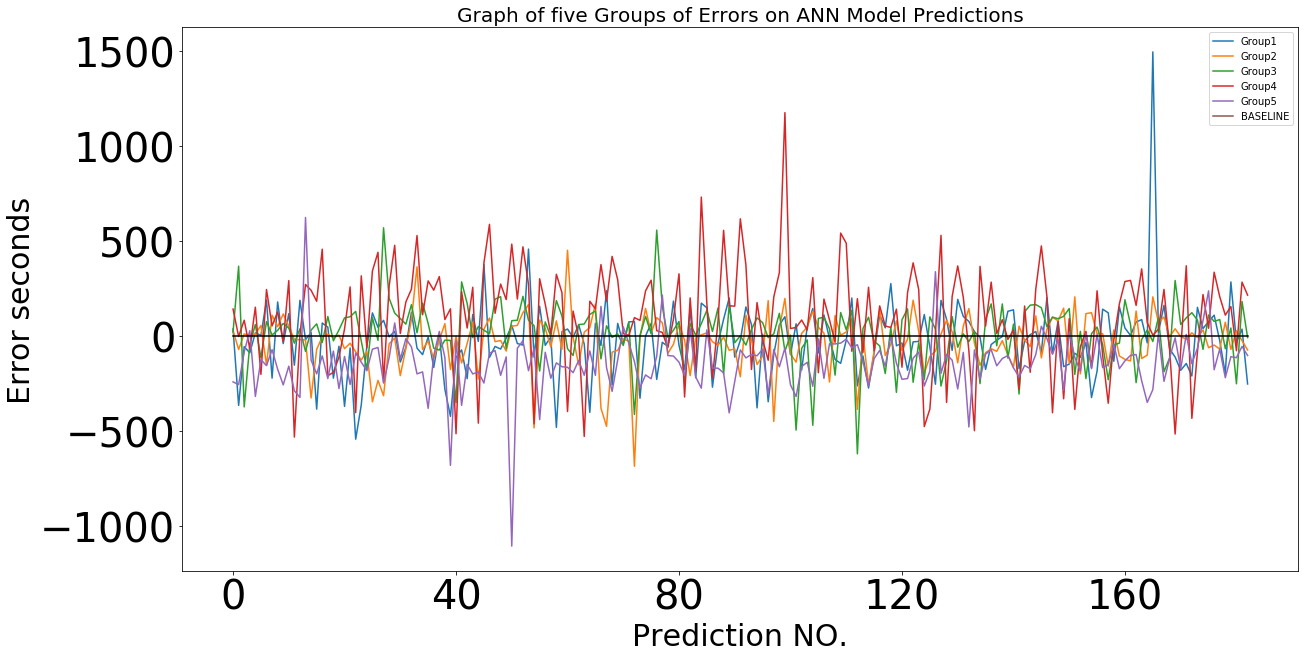

In [220]:
import matplotlib.pyplot as plt
plt.figure()
df.plot(figsize=(20, 10),fontsize=40)
plt.gca().get_lines()[5].set_color("black")
plt.title('Graph of five Groups of Errors on ANN Model Predictions', fontsize=20)
plt.xlabel('Prediction NO.',fontsize=30)
plt.ylabel('Error seconds',fontsize=30)
#fig.suptitle('test title', fontsize=20)
#axis(side=1, at=c(0:23))
#start, end = ax.get_xlim()
#ax.xaxis.set_ticks(np.arange(start, end, 1))
plt.xticks(np.arange(0, 183, 40))
plt.show()

In [71]:
# Storage Trained model in a file
'''
import pickle
file = "39A_2017_06.clf"
output = open(file, 'wb')
pickle.dump(clf, output)
output.close()
'''

In [72]:
file = "39A_2017_06.clf"
pkl_file = open(file, 'rb')
new_clf = pickle.load(pkl_file)

# 10-folds crossing-validation testing

In [119]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
def generalCrossValidationData(n_folds=10):
    '''
        This function is to separate DataFrame into k folds groups, each group include 90% train data and 10% test data,
        which is followed k-folds Cross-validation model.
        Input Value:
                - the number of folds, default is 10 folds
        Retrun Value:
                - ({k groups of train dataset}, {k group of test dataset})
    '''
    # Reading from a csv file, into a data frame
    # Drop 'customer' column because it is not continuous feature
    # Randomly shuffle the dataset
    # here you get 70% of the rows for train
    # this code tries to find that train = 70% and test = 30%
    #df = pd.read_csv("39A_73stations_JUN.csv")
    df = pd.read_csv("39A_a_73stations_WEATHER_JUN.csv")

    # X Descriptive features (6 continous features)
    # y Target feature (happiness_class)
    a_columns = []
    b_columns = []
    # 74 is the total number of 39A bus stations
    #columns = []
    for i in range(1,74):
        a_columns.append('{}_P'.format(str(i).zfill(3)))
        b_columns.append('{}_A'.format(str(i).zfill(3)))
    all_columns = a_columns + b_columns + ['Rain', 'Sun']
    new_df = pd.concat([df[all_columns]], axis=1)
 
    # we use k-folds cross validation model and we separate the data into 10 groups of train & test datasets
    # we use KFold method to separate the dataset based 10-folds Cross-validation rule
    from sklearn.cross_validation import KFold
    kf = KFold(len(new_df), n_folds=n_folds)
    train_index = {}
    test_index = {}
    count = 0
    for indexA, indexB in kf:
        train_index[count] = indexA
        test_index[count] = indexB
        count += 1

    trains = {}
    tests = {}
    for i in range(10):
        trains[i] = new_df.loc[train_index[i]]
        tests[i] = new_df.loc[test_index[i]]
    return (trains, tests)

In [120]:
trains, tests = generalCrossValidationData(10)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [121]:
trains[0].head()

,001_P,002_P,003_P,004_P,005_P,006_P,007_P,008_P,009_P,010_P,...,066_A,067_A,068_A,069_A,070_A,071_A,072_A,073_A,Rain,Sun
65,43200.0,43330.0,43353.0,43397.0,43415.0,43452.0,43494.0,43543.0,43609.0,43670.0,...,49308.0,49353.0,49429.0,49497.0,49524.0,49577.0,49631.0,49703.0,0.0,1.0
66,43200.0,43330.0,43353.0,43397.0,43415.0,43452.0,43494.0,43543.0,43609.0,43670.0,...,48368.0,48410.0,48494.0,48581.0,48609.0,48670.0,48704.0,48727.0,0.0,1.0
67,55200.0,55366.0,55396.0,55459.0,55485.0,55538.0,55569.0,55606.0,55656.0,55717.0,...,60999.0,61039.0,61122.0,61209.0,61242.0,61310.0,61343.0,61369.0,1.0,1.0
68,55200.0,55366.0,55396.0,55459.0,55485.0,55538.0,55569.0,55606.0,55656.0,55717.0,...,60783.0,60820.0,60894.0,60969.0,61002.0,61062.0,61091.0,61110.0,0.0,0.0
69,68400.0,68520.0,68580.0,68634.0,68656.0,68700.0,68748.0,68804.0,68880.0,68940.0,...,72768.0,72830.0,72894.0,72977.0,72991.0,73065.0,73080.0,73080.0,0.0,0.0


In [122]:
# 10-fold crossing validation testing
scores = 0
vscores = 0
MSES = 0
a_columns = []
b_columns = []
for i in range(1,74):
        a_columns.append('{}_P'.format(str(i).zfill(3)))
        b_columns.append('{}_A'.format(str(i).zfill(3)))
#all_columns = a_columns + b_columns
a_columns = ['Rain', 'Sun'] + a_columns
# BP neural networking training
import numpy as np
#from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
# X Descriptive features (4 features)
# y Target feature (TripDuration)
scores = 0
for i in range(10):
    train = trains[i]
    test = tests[i]
    
    train_X = pd.concat([train[a_columns]], axis=1)
    train_y = train[b_columns]
    train_X = train_X.fillna(train_X.mean())
    train_y = train_y.fillna(train_y.mean())
    
    test_X = pd.concat([test[a_columns]])
    test_y = test[b_columns]
    test_X = test_X.fillna(test_X.mean())
    test_y = test_y.fillna(test_y.mean())
    
    # Instantiate model
    # 99% score
    clf = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(10, 10, 10), random_state=1)
    clf.fit(train_X,train_y)

    # Fit Model
    clf.fit(train_X, train_y)
    score = clf.score(test_X, test_y)
    scores += score
    print("test {} Score: {}".format(i+1,score))
    
    # Make predictions using the testing set
    diabetes_y_pred = clf.predict(test_X)
     # The mean squared error
    MSE = mean_squared_error(test_y, diabetes_y_pred)
    MSES += MSE
    print("\tMean squared error: %.2f"
      % MSE)
    
    # Explained variance score: 1 is perfect prediction
    vscore = r2_score(test_y, diabetes_y_pred)
    vscores += vscore
    print('\tVariance score: %.2f' % vscore)
print("Average of Score is: ", scores/10)
print("Average of MSES is: ", MSES/10)
print("Average of vscore is: ", vscores/10)

test 1 Score: 0.9983597349900019
	Mean squared error: 401600.96
	Variance score: 1.00
test 2 Score: 0.9981950319230753
	Mean squared error: 469531.53
	Variance score: 1.00
test 3 Score: 0.998332358932105
	Mean squared error: 422695.71
	Variance score: 1.00
test 4 Score: 0.9983277355222427
	Mean squared error: 391922.69
	Variance score: 1.00
test 5 Score: 0.9980130376632868
	Mean squared error: 392595.45
	Variance score: 1.00
test 6 Score: 0.9955984400680772
	Mean squared error: 887445.79
	Variance score: 1.00
test 7 Score: 0.9900648477279624
	Mean squared error: 2767082.00
	Variance score: 0.99
test 8 Score: 0.9980346606241616
	Mean squared error: 403202.91
	Variance score: 1.00
test 9 Score: 0.9986336710890028
	Mean squared error: 280698.15
	Variance score: 1.00
test 10 Score: 0.9982991858190325
	Mean squared error: 405211.80
	Variance score: 1.00
Average of Score is:  0.9971858704358947
Average of MSES is:  682198.6999411491
Average of vscore is:  0.9971903771183408
